In [2]:
import numpy as np
# from keras.datasets import mnist
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# (x_train_load, y_train_load), (x_test_load, y_test_load) = datasets.cifar10.load_data()
(x_train_load, y_train_load), (x_test_load, y_test_load) = cifar100.load_data()

# 處理數據
x_train_load = x_train_load[:500]
y_train_load = y_train_load[:500]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)

169001437/169001437 [==============================] - 71s 0us/step
(20, 32, 32, 3)
[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]]


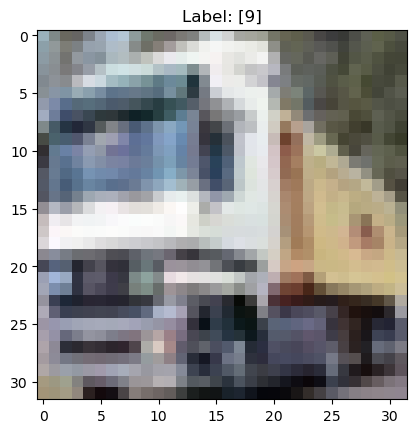

In [4]:
plt.imshow(x_train_load[1])
plt.title(f'Label: {y_train_load[1]}')
plt.show()
 

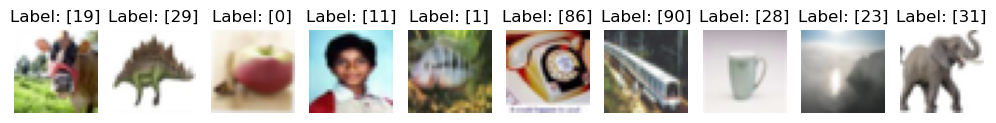

In [4]:
# 使用 matplotlib 顯示多張圖像
# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train_load[i])
    ax.set_title(f'Label: {y_train_load[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [5]:
print(x_test_load.shape)
x_test_load[1]

(20, 32, 32, 3)


array([[[113, 130,  98],
        [ 88, 105,  73],
        [ 72,  89,  58],
        ...,
        [105, 124,  93],
        [ 86, 106,  74],
        [ 63,  82,  55]],

       [[ 95, 113,  80],
        [ 78,  97,  64],
        [ 62,  80,  49],
        ...,
        [103, 122,  84],
        [ 89, 109,  70],
        [ 65,  83,  49]],

       [[ 79,  97,  62],
        [ 65,  82,  49],
        [ 52,  67,  37],
        ...,
        [ 65,  79,  52],
        [ 62,  79,  51],
        [ 49,  64,  38]],

       ...,

       [[121, 102,  86],
        [127, 108,  96],
        [139, 121, 111],
        ...,
        [ 80, 100,  71],
        [ 75,  95,  68],
        [ 66,  85,  62]],

       [[170, 145, 131],
        [167, 145, 132],
        [159, 140, 128],
        ...,
        [100, 113,  84],
        [ 89, 103,  77],
        [ 73,  87,  64]],

       [[168, 150, 135],
        [170, 152, 137],
        [173, 156, 141],
        ...,
        [118, 123,  96],
        [ 99, 106,  80],
        [ 84,  92,  67]]

## Image data format
  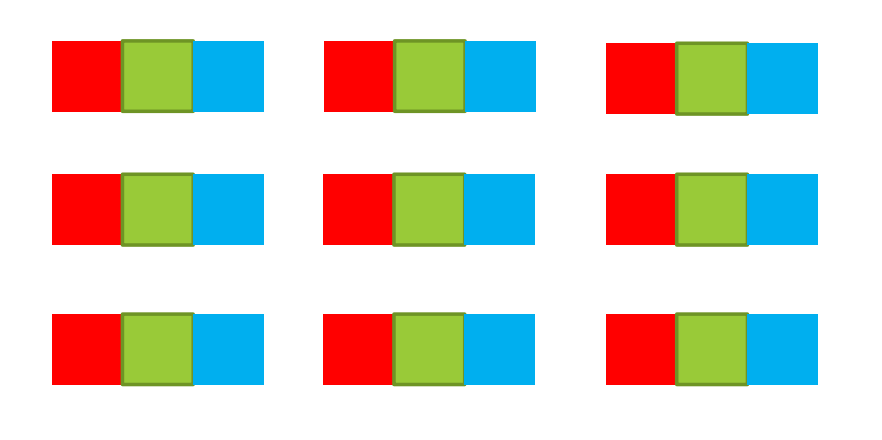
  ### [ [ [R,G,B], [R,G,B], [R,G,B] ],  
###   [ [R,G,B], [R,G,B], [R,G,B] ],
###   [ [R,G,B], [R,G,B], [R,G,B] ] ] 